# Hierarchical matrices - H matrices

In [43]:
using Plots
nnos=40 # tem que ser par
NOS_GEO=zeros(nnos,2)
ELEM=zeros(Int64,nnos-2,2)
i1=1:Int64(nnos/2)-1
i2=Int64(nnos/2):nnos-2
b1=1:Int64(nnos/2)-1
b2=Int64(nnos/2):nnos-2
ELEM[i2,1]=i2.+1
ELEM[i1,1]=i1
ELEM[i2,2]=i2.+2
ELEM[i1,2]=i1.+1
NOS_GEO[1:nnos,1]=range(0.,length=nnos,stop=2.)
NOS_GEO[1:nnos,2]=2. .-range(0.,length=nnos,stop=2.)
#NOS_GEO[1:nnos,2].=2.
NOS_GEO[Int64(nnos/2)+1:nnos,2]=20. .*ones(Int64(nnos/2));

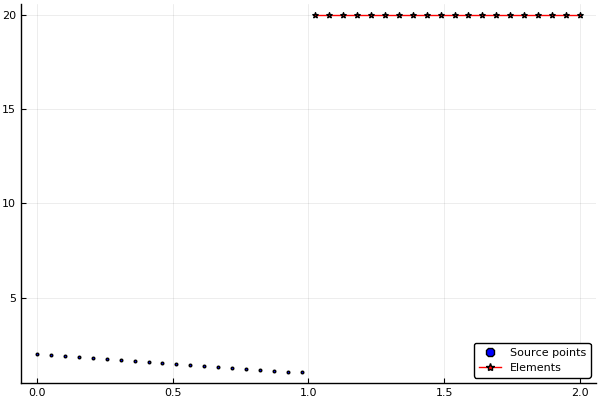

In [44]:
pyplot()
plot(NOS_GEO[1:Int64(nnos/2),1],NOS_GEO[1:Int64(nnos/2),2],color="blue",seriestype=:scatter,label="Source points",
    marker=(2,2.0,:o))
plot!(NOS_GEO[Int64(nnos/2)+1:nnos,1],NOS_GEO[Int64(nnos/2)+1:nnos,2],color="red",label="Elements",
    marker=(4,4.0,:s),legend=:bottomright)

In [45]:
function criapontosinterp(n)
    x= cos.((2. .*(1:n) .-1).*pi./2. ./n)
end

criapontosinterp (generic function with 1 method)

In [46]:
function calc_fforma(qsi)
  # Calcula as funções de forma lineares contínuas N1 e N2
  N1=1. /2. .*(1. .-qsi); # Função de forma N1 => linear contínua
  N2=1. /2. .*(1. .+qsi); # Função de forma N2 => linear contínua
  return N1,N2
end

calc_fforma (generic function with 1 method)

In [47]:
function lagrange(pg,x,n)
    ni = length(pg);
    L = ones(ni,n);
    for j = 1:n
        for i = 1:n
            if (i != j)
                L[:,j] = L[:,j].*(pg .- x[i])/(x[j]-x[i]);
            end
        end
    end
    return L
end

function lagrange(pg,x1,n1,x2,n2)
    l1=lagrange(pg[:,1],x1,n1)
    l2=lagrange(pg[:,2],x2,n2)
    ni=size(pg,1)
    L=zeros(ni,n1*n2)
    for i=1:ni
        L[i,:]=(l1[i,:]*l2[i,:]')[:]
    end
    L
end

lagrange (generic function with 2 methods)

In [48]:
function Gauss_Legendre(x1,x2,n)

x = zeros(n);
w = zeros(n);
pp=0; # inicializando variável pp

eps=3e-14;
m=round(Int,(n+1)/2);
xm=.5*(x2+x1);
xl=.5*(x2-x1);
for i=1:m
    z=cos(pi*(i-.25)/(n+.5));
    while 1==1
        p1=1.;
        p2=0.;
        for j=1:n
            p3=p2;
            p2=p1;
            p1=((2*j-1)*z*p2-(j-1)*p3)/j;
        end
        pp=n*(z*p1-p2)/(z*z-1);
        z1=z;
        z=z1-p1/pp;
        if(abs(z-z1)<eps)
            break
        end
    end
    x[i]=xm-xl*z;
    x[n+1-i]=xm+xl*z;
    w[i]=2*xl/((1-z*z)*pp*pp);
    w[n+1-i]=w[i];
end
    
return x,w
end

Gauss_Legendre (generic function with 1 method)

In [49]:
xmax=zeros(1,2)
xmin=zeros(1,2)
xmax[1]=maximum(NOS_GEO[b1,1])
xmin[1]=minimum(NOS_GEO[b1,1])
xmax[2]=maximum(NOS_GEO[b1,2])
xmin[2]=minimum(NOS_GEO[b1,2])
xs=criapontosinterp(ninterp)
xint=zeros(ninterp*ninterp,2)
n1,n2=calc_fforma(xs)
xks=n1 .*xmin .+ n2 .*xmax
npg=4
xi,w=Gauss_Legendre(-1,1,npg)


([-0.861136, -0.339981, 0.339981, 0.861136], [0.347855, 0.652145, 0.652145, 0.347855])

In [50]:
ninterp=2
ϵ=1e-6
GG = zeros(ninterp*ninterp,length(b2))      # Dimensiona matriz G
HH = zeros(ninterp*ninterp,length(b2))      # Dimensiona matriz H
xmax=zeros(1,2)
xmin=zeros(1,2)
# (xmin[1],xmin[2]),(xmax[1],xmax[2]) => bounding box
xmax[1]=maximum(NOS_GEO[b1,1])
xmin[1]=minimum(NOS_GEO[b1,1])
xmax[2]=maximum(NOS_GEO[b1,2])
xmin[2]=minimum(NOS_GEO[b1,2])
xs=criapontosinterp(ninterp)
xint=zeros(ninterp*ninterp,2)
n1,n2=calc_fforma(xs)
xks=n1 .*xmin .+ n2 .*xmax
k=1
ci=0
npg=4
xi,w=Gauss_Legendre(-1,1,npg)
for i2 =1:ninterp # Laco sobre os pontos fontes
    for i1 =1:ninterp # Laco sobre os pontos fontes
        ci+=1
        xd=xks[i1,1]; # Coordenada x do ponto fonte
        yd=xks[i2,2]; # Coordenada y do ponto fonte
        xint[ci,:]=[xd yd]
        cj=0       
        for j in b2 # Laco sobre os elementos
            cj+=1
            noi::Int64=ELEM[j,1]; # Ponto inicial do elemento
            nof::Int64=ELEM[j,2]; # Ponto final do elemento
            x1=NOS_GEO[noi,1]; # Coordenada x do ponto inicial do elemento
            x2=NOS_GEO[nof,1]; # Coordenada x do ponto final do elemento
            y1=NOS_GEO[noi,2]; # Coordenada y do ponto inicial do elemento
            y2=NOS_GEO[nof,2];  # Coordenada y do ponto final do elemento
            L=sqrt((x2-x1)^2+(y2-y1)^2)
            sx=(x2-x1)/L
            sy=(y2-y1)/L
            nx=sy
            ny=-sx
            g=0
            h=0
            for kk =1:npg
                n1,n2=calc_fforma(xi[kk])
                x=n1*x1+n2*x2
                y=n1*y1+n2*y2
                rx=x-xd
                ry=y-yd
                r=sqrt(rx^2+ry^2)
                rdx=rx/r
                rdy=ry/r
                nr=nx*rdx+ny*rdy
                Tast=-1/(2*pi)*log(r)
                qast=nr/(2*pi*r)
                g=g+Tast*L/2*w[kk]
                h=h+qast*L/2*w[kk]
            end
            GG[ci,cj] = g
            HH[ci,cj] = h
        end
    end
end
if(abs(xmax[1]-xmin[1])<ϵ)
    fontes=(2. .*(NOS_GEO[b1,2] .-xmin[2])./(xmax[2]-xmin[2]).-1);
    LL=lagrange(fontes,xs,ninterp);
    L=[LL LL]./2;
elseif(abs(xmax[2]-xmin[2])<ϵ)
    fontes=(2. .*(NOS_GEO[b1,1] .-xmin[1])./(xmax[1]-xmin[1]).-1);
    LL=lagrange(fontes,xs,ninterp);
    L=[LL LL]./2;
else
    fontes=[(2. .*(NOS_GEO[b1,1] .- xmin[1]) ./(xmax[1]-xmin[1]).-1) (2. .*(NOS_GEO[b1,2] .-xmin[2])./(xmax[2]-xmin[2]).-1)];
    L=lagrange(fontes,xs,ninterp,xs,ninterp);
end

19×4 Array{Float64,2}:
 -0.25       1.45711      0.0428932    -0.25     
 -0.145062   1.2736       0.0165224    -0.145062 
 -0.0524691  1.10244      0.00249719   -0.0524691
  0.0277778  0.943627     0.000817701   0.0277778
  0.095679   0.797158     0.0114839     0.095679 
  0.151235   0.663035     0.0344958     0.151235 
  0.194444   0.541258     0.0698533     0.194444 
  0.225309   0.431826     0.117557      0.225309 
  0.243827   0.33474      0.177605      0.243827 
  0.25       0.25         0.25          0.25     
  0.243827   0.177605     0.33474       0.243827 
  0.225309   0.117557     0.431826      0.225309 
  0.194444   0.0698533    0.541258      0.194444 
  0.151235   0.0344958    0.663035      0.151235 
  0.095679   0.0114839    0.797158      0.095679 
  0.0277778  0.000817701  0.943627      0.0277778
 -0.0524691  0.00249719   1.10244      -0.0524691
 -0.145062   0.0165224    1.2736       -0.145062 
 -0.25       0.0428932    1.45711      -0.25     

In [51]:
G = zeros(length(b1),length(b2))      # Dimensiona matriz G
H = zeros(length(b1),length(b2))      # Dimensiona matriz H
ci=0
npg=4
xi,w=Gauss_Legendre(-1,1,npg)
for i  in b1 # Laco sobre os pontos fontes
        ci+=1
        no1::Int64=ELEM[i,1]; # Ponto inicial do elemento
        no2::Int64=ELEM[i,2]; # Ponto final do elemento    
        x1=NOS_GEO[no1,1]; # Coordenada x do ponto fonte
        y1=NOS_GEO[no1,2]; # Coordenada y do ponto fonte
        x2=NOS_GEO[no2,1]; # Coordenada x do ponto fonte
        y2=NOS_GEO[no2,2]; # Coordenada y do ponto fonte
        xd=(x1+x2)/2
        yd=(y1+y2)/2
        cj=0
        for j in b2 # Laco sobre os elementos
            cj+=1
            noi::Int64=ELEM[j,1]; # Ponto inicial do elemento
            nof::Int64=ELEM[j,2]; # Ponto final do elemento
            x1=NOS_GEO[noi,1]; # Coordenada x do ponto inicial do elemento
            x2=NOS_GEO[nof,1]; # Coordenada x do ponto final do elemento
            y1=NOS_GEO[noi,2]; # Coordenada y do ponto inicial do elemento
            y2=NOS_GEO[nof,2];  # Coordenada y do ponto final do elemento
            comp=sqrt((x2-x1)^2+(y2-y1)^2)
            sx=(x2-x1)/comp
            sy=(y2-y1)/comp
            nx=sy
            ny=-sx
            g=0
            h=0
            for kk =1:npg
                n1,n2=calc_fforma(xi[kk])
                x=n1*x1+n2*x2
                y=n1*y1+n2*y2
                rx=x-xd
                ry=y-yd
                r=sqrt(rx^2+ry^2)
                rdx=rx/r
                rdy=ry/r
                nr=nx*rdx+ny*rdy
                Tast=-1/(2*pi)*log(r)
                qast=nr/(2*pi*r)
                g=g+Tast*comp/2*w[kk]
                h=h+qast*comp/2*w[kk]
            end
        G[ci,cj] = g
        H[ci,cj] = h
    end
end

In [52]:
G

19×19 Array{Float64,2}:
 -0.0236154  -0.0236168  -0.0236182  …  -0.0236448  -0.0236472  -0.0236497
 -0.0236373  -0.0236385  -0.0236399     -0.0236655  -0.0236678  -0.0236701
 -0.0236591  -0.0236603  -0.0236616     -0.0236861  -0.0236884  -0.0236906
 -0.023681   -0.0236821  -0.0236833     -0.0237068  -0.023709   -0.0237112
 -0.0237028  -0.0237039  -0.023705      -0.0237275  -0.0237296  -0.0237317
 -0.0237247  -0.0237257  -0.0237268  …  -0.0237483  -0.0237503  -0.0237523
 -0.0237466  -0.0237476  -0.0237485     -0.023769   -0.0237709  -0.0237729
 -0.0237685  -0.0237694  -0.0237703     -0.0237898  -0.0237917  -0.0237936
 -0.0237905  -0.0237912  -0.0237921     -0.0238106  -0.0238124  -0.0238142
 -0.0238124  -0.0238131  -0.0238139     -0.0238314  -0.0238331  -0.0238349
 -0.0238343  -0.023835   -0.0238357  …  -0.0238522  -0.0238539  -0.0238556
 -0.0238563  -0.0238568  -0.0238575     -0.0238731  -0.0238747  -0.0238763
 -0.0238782  -0.0238787  -0.0238793     -0.023894   -0.0238955  -0.023897 
 

In [53]:
L*GG

19×19 Array{Float64,2}:
 -0.0236045  -0.0236058  -0.0236073  …  -0.0236345  -0.0236369  -0.0236394
 -0.0236263  -0.0236276  -0.023629      -0.0236551  -0.0236575  -0.0236599
 -0.0236482  -0.0236494  -0.0236507     -0.0236758  -0.023678   -0.0236804
 -0.02367    -0.0236712  -0.0236724     -0.0236965  -0.0236987  -0.0237009
 -0.0236919  -0.023693   -0.0236942     -0.0237172  -0.0237193  -0.0237215
 -0.0237138  -0.0237148  -0.0237159  …  -0.0237379  -0.0237399  -0.0237421
 -0.0237357  -0.0237367  -0.0237377     -0.0237586  -0.0237606  -0.0237626
 -0.0237576  -0.0237585  -0.0237594     -0.0237794  -0.0237813  -0.0237833
 -0.0237795  -0.0237803  -0.0237812     -0.0238002  -0.023802   -0.0238039
 -0.0238014  -0.0238022  -0.023803      -0.023821   -0.0238228  -0.0238246
 -0.0238233  -0.023824   -0.0238248  …  -0.0238418  -0.0238435  -0.0238452
 -0.0238453  -0.0238459  -0.0238466     -0.0238627  -0.0238643  -0.0238659
 -0.0238672  -0.0238678  -0.0238684     -0.0238835  -0.0238851  -0.0238867
 

In [54]:
GG

4×19 Array{Float64,2}:
 -0.0236525  -0.0236529  -0.0236533  …  -0.0236662  -0.0236676  -0.0236691
 -0.0236621  -0.0236633  -0.0236645     -0.0236889  -0.0236912  -0.0236934
 -0.0239411  -0.0239414  -0.0239418     -0.0239538  -0.0239551  -0.0239565
 -0.02395    -0.0239511  -0.0239523     -0.023975   -0.0239771  -0.0239792

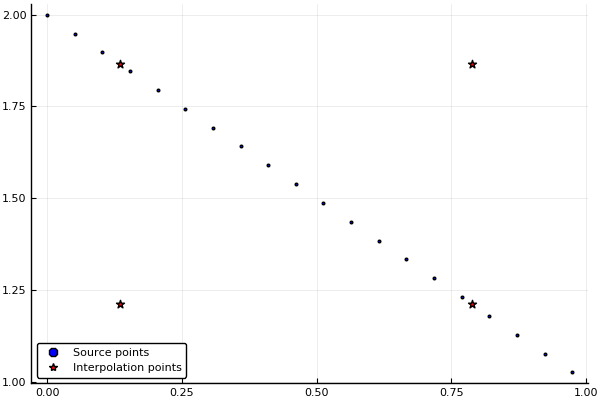

In [55]:
plot(NOS_GEO[1:Int64(nnos/2),1],NOS_GEO[1:Int64(nnos/2),2],color="blue",seriestype=:scatter,label="Source points",
    marker=(2,2.0,:o))
plot!(xint[:,1],xint[:,2],seriestype=:scatter,color="red",label="Interpolation points",
    marker=(6,6.0,:s),legend=:bottomleft)